# Financial Analysis with Python : A Comprehensive Tutorial

### Sara Mezuri

## Introduction

Python holds immense importance in the financial world due to its versatility, efficiency, and extensive ecosystem of libraries. Its readability and ease of integration make it a preferred language for rapidly developing and deploying sophisticated financial models, contributing significantly to the finance industry.
NumPy, Pandas, and Matplotlib play pivotal roles in the field of financial analysis by providing powerful tools for data manipulation, analysis, and visualization. 
NumPy's array-based computations help with numerical operations, and assist in the implementation of complex financial models.
Pandas, because of its DataFrame structure, help simplifying data manipulation and cleaning, and transforming financial datasets.
Matplotlib, as a plotting library, enables the creation of clear and insightful visualizations, essential for interpreting complex financial trends and patterns.

The primary goal of this project is to explore the world of financial analysis using Python, focusing on key libraries such as NumPy, Pandas and Matplotlib. The outcome of this project is to create a tutorial on the process of analyzing financial data and vizualizing the result as well.

## Background

For this project, my focus is on conducting a comprehensive analysis of the impact of COVID-19 on the European Stock Market. 
To achieve this, I will perform a thorough financial analysis of various stock indexes across Europe, more precisely: 

* EURO STOXX 50 (The index holds stocks from eight eurozone countries: Belgium, Finland, France, Germany, Ireland, Italy, the Netherlands, and Spain.)
* FTSE 100 (The FTSE 100 Index is a index of the 100 most highly capitalized companies traded on the London Stock Exchange.)
* DAX (The DAX is stock market index consisting of the 40 major German companies trading on the Frankfurt Stock Exchange.)
* CAC40 (The CAC 40 is the index of the largest 40 companies listed in France)
* FTSE MIB (The Index consists of the 40 stocks listed on the Milano Borsa Italiana.)
* SMI (The index SMI is the most important stock index in Switzerland and comprises the 20 largest stocks.) 
* IBEX 35 (The IBEX 35 is the official index of the Spanish Continuous Exchange, comprised of the 35 most liquid stocks.)

![A representation of the world stock market](world-markets.jpg)

I plan to collect historical stock data from 2017 to 2022, aiming to recognize patterns and trends. Through a detailed analysis, I aim to extract valuable insights that can shed light on the impact of COVID-19 on the European Stock Market, providing a comprehensive understanding of the market dynamics during this period.

## Outline

* Importing the data
    - installing yfinance library
    - creating a dataframe
* Exploratory Data Analysis
* Data Visualization    
    - Missing Values Visualization
    - Line Charts
    - Candlestick Charts
* Financial Analysis 
    - Daily Returns
    - Average Daily Returns 
    - Volatility

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

## Importing the data

To import stock data, we will use a Python library called `yfinance`, which provides a convenient way for pulling different financial data from various online sources such as: Yahoo Finance, and putting all these data into a Pandas DataFrame. 

First, we must install `yfinance`. To do so, we type `pip install pandas yfinance` into the command prompt. 

 It should look something like this: 
    
    ` Downloading yfinance-0.2.33-py2.py3-none-any.whl (69 kB)
     |████████████████████████████████| 69 kB 1.4 MB/s
Requirement already satisfied: python-dateutil>=2.7.3 in c:\users\saram\anaconda3\lib\site-packages (from pandas) (2.8.2)
Requirement already satisfied: numpy>=1.17.3 in c:\users\saram\anaconda3\lib\site-packages (from pandas) (1.20.3)
Requirement already satisfied: pytz>=2017.3 in c:\users\saram\anaconda3\lib\site-packages (from pandas) (2021.3)
Collecting frozendict>=2.3.4 `


After sucessfully installing `yfinance`, let's import the libraries. 

In [2]:
import datetime 
import yfinance as yf

After installing and importing `yfinance`, we are ready to import the data. 

We start by first specifying the **start** and the **end** dates using python datetime module. 

In [3]:
# Set the start and end dates for your analysis. 
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
print(start_date)
print(end_date)

2017-01-01 00:00:00
2022-12-31 00:00:00


Then we will select the stocks (or tickers) that we want to analyse.  
To find the stocks we are interested in, we go to Yahoo Finance [https://uk.finance.yahoo.com] and search each stock as shown below: 
![](fyahoo.jpg)

The highlighted name is the ticker for each stock index. 

Next, we want to import all these stock index tickers using `yfinance`, then we want to create a data frame containing all of them. 

In [4]:
# First, let's define a list with all the stock tickers
stock_index = ['FTSEMIB.MI', '^GDAXI', '^FTSE', '^FCHI', '^IBEX', '^SSMI', '^STOXX50E']
print(stock_index)

# Then we create an empty data frame to store the data
stock_data = pd.DataFrame() 

# We create a loop that downloads each stock index individually and then we appends it to the dataframe
for stock in stock_index:
    data = yf.download(stock, start = start_date, end = end_date)
    column_names = [f'{stock}_{column}' for column in data.columns]
    data.columns = column_names
    # concatenates the dataframes horizontally based on columns
    stock_data = pd.concat([stock_data, data], axis=1)

# Show the first rows of the dataframe    
print(stock_data.head())

# Show the last rows of the dataframe
print(stock_data.tail())

['FTSEMIB.MI', '^GDAXI', '^FTSE', '^FCHI', '^IBEX', '^SSMI', '^STOXX50E']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

            FTSEMIB.MI_Open  FTSEMIB.MI_High  FTSEMIB.MI_Low  \
Date                                                           
2017-01-02          19208.0          19579.0         19201.0   
2017-01-03          19667.0          19811.0         19564.0   
2017-01-04          19669.0          19735.0         19504.0   
2017-01-05          19599.0          19733.0         19562.0   
2017-01-06          19690.0          19715.0         19517.0   

            FTSEMIB.MI_Close  FTSEMIB.MI_Adj Close  FTSEMIB.MI_Volume  \
Date                                                                    
2017-01-02           19567.0               19567.0        408103000.0   
2017-01-03           19573.0               19573.0        756855700.0   
2017-01-04           19627.0               19627.0        542401500.0   
2017-01-05           19643.0               19643.0        555689100.0   
2017-01-06           19688.0               19688.0        461959000.0   

             ^GDAXI_Open   ^GDAXI_High 

## Exploratory Data Anlysis
Now let's look at this DataFrame and get an idea of what our data looks like. 

First, let's use `shape` to get a better understanding of our dataframe. 

In [5]:
stock_data.shape

(1540, 42)

Then, we use `info()` method to get a summary of the DataFrame, including information about the data types, non-null values and its structure.

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1540 entries, 2017-01-02 to 2022-12-30
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FTSEMIB.MI_Open       1524 non-null   float64
 1   FTSEMIB.MI_High       1524 non-null   float64
 2   FTSEMIB.MI_Low        1524 non-null   float64
 3   FTSEMIB.MI_Close      1524 non-null   float64
 4   FTSEMIB.MI_Adj Close  1524 non-null   float64
 5   FTSEMIB.MI_Volume     1524 non-null   float64
 6   ^GDAXI_Open           1520 non-null   float64
 7   ^GDAXI_High           1520 non-null   float64
 8   ^GDAXI_Low            1520 non-null   float64
 9   ^GDAXI_Close          1520 non-null   float64
 10  ^GDAXI_Adj Close      1520 non-null   float64
 11  ^GDAXI_Volume         1520 non-null   float64
 12  ^FTSE_Open            1514 non-null   float64
 13  ^FTSE_High            1514 non-null   float64
 14  ^FTSE_Low             1514 non-null   float64
 15  ^FT

Here, I can tell that I do not have the same amount of data for all the stock indices, but since it is not a significant difference, it will not give us any issues. However, it might suggest that we might have some missing data. 

In [7]:
# The code below will print the columns of the dataframe

stock_data.columns

Index(['FTSEMIB.MI_Open', 'FTSEMIB.MI_High', 'FTSEMIB.MI_Low',
       'FTSEMIB.MI_Close', 'FTSEMIB.MI_Adj Close', 'FTSEMIB.MI_Volume',
       '^GDAXI_Open', '^GDAXI_High', '^GDAXI_Low', '^GDAXI_Close',
       '^GDAXI_Adj Close', '^GDAXI_Volume', '^FTSE_Open', '^FTSE_High',
       '^FTSE_Low', '^FTSE_Close', '^FTSE_Adj Close', '^FTSE_Volume',
       '^FCHI_Open', '^FCHI_High', '^FCHI_Low', '^FCHI_Close',
       '^FCHI_Adj Close', '^FCHI_Volume', '^IBEX_Open', '^IBEX_High',
       '^IBEX_Low', '^IBEX_Close', '^IBEX_Adj Close', '^IBEX_Volume',
       '^SSMI_Open', '^SSMI_High', '^SSMI_Low', '^SSMI_Close',
       '^SSMI_Adj Close', '^SSMI_Volume', '^STOXX50E_Open', '^STOXX50E_High',
       '^STOXX50E_Low', '^STOXX50E_Close', '^STOXX50E_Adj Close',
       '^STOXX50E_Volume'],
      dtype='object')

In [8]:
# The code below will print the index of the dataframe

stock_data.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=1540, freq=None)

Then, let's use `describe()` method to generate a descriptive statistics of the numerical columns. It It provides information such as mean, standard deviation, minimum, maximum, and quartile values.

In [9]:
stock_data.describe()

FTSEMIB.MI_Open  FTSEMIB.MI_High  FTSEMIB.MI_Low  FTSEMIB.MI_Close  \
count      1524.000000      1524.000000     1524.000000       1524.000000   
mean      22165.286745     22316.681759    21996.854331      22158.506562   
std        2401.877479      2387.254117     2411.846756       2405.728795   
min       14986.000000     15438.000000    14153.000000      14894.000000   
25%       20549.750000     20708.750000    20406.500000      20560.000000   
50%       21995.500000     22158.000000    21837.000000      21984.500000   
75%       23850.750000     23965.250000    23682.000000      23830.500000   
max       28002.000000     28213.000000    27951.000000      28163.000000   

       FTSEMIB.MI_Adj Close  FTSEMIB.MI_Volume   ^GDAXI_Open   ^GDAXI_High  \
count           1524.000000       1.524000e+03   1520.000000   1520.000000   
mean           22158.506562       4.438851e+08  13048.353456  13126.502371   
std             2405.728795       1.672094e+08   1402.537753   1398.201068   
min            14894.000000       0.000000e+00   8495.940430   8668.480469   
25%            20560.000000       3.428951e+08  12153.147705  12245.000244   
50%            21984.500000       4.097870e+08  12812.750000  12882.709961   
75%            23830.500000       4.958832e+08  13837.052246  13933.479980   
max            28163.000000       2.015242e+09  16269.219727  16290.190430   

         ^GDAXI_Low  ^GDAXI_Close  ...     ^SSMI_Low   ^SSMI_Close  \
count   1520.000000   1520.000000  ...   1498.000000   1498.000000   
mean   12962.562415  13046.671414  ...  10068.975457  10123.528242   
std     1405.530556   1402.963366  ...   1194.873390   1199.596384   
min     8255.650391   8441.709961  ...   7650.229980   8160.790039   
25%    12097.270264  12173.789795  ...   8995.064941   9031.487549   
50%    12729.360352  12817.654785  ...   9944.794922   9992.759766   
75%    13712.452637  13838.352539  ...  10894.772217  10959.402344   
max    16240.509766  16271.750000  ...  12905.530273  12970.530273   

       ^SSMI_Adj Close  ^SSMI_Volume  ^STOXX50E_Open  ^STOXX50E_High  \
count      1498.000000  1.498000e+03     1509.000000     1509.000000   
mean      10123.528242  5.520845e+07     3562.367132     3584.884931   
std        1199.596384  2.464872e+07      333.027441      330.983543   
min        8160.790039  0.000000e+00     2388.939941     2461.570068   
25%        9031.487549  4.097042e+07     3359.709961     3381.629883   
50%        9992.759766  5.043045e+07     3512.040039     3531.530029   
75%       10959.402344  6.247490e+07     3738.909912     3766.020020   
max       12970.530273  2.657352e+08     4400.729980     4415.229980   

       ^STOXX50E_Low  ^STOXX50E_Close  ^STOXX50E_Adj Close  ^STOXX50E_Volume  
count    1509.000000      1509.000000          1509.000000      1.509000e+03  
mean     3538.547337      3562.256634          3562.256634      3.785120e+07  
std       335.195952       333.325720           333.325720      1.584098e+07  
min      2302.840088      2385.820068          2385.820068      0.000000e+00  
25%      3334.239990      3361.050049          3361.050049      2.910260e+07  
50%      3493.030029      3514.320068          3514.320068      3.486370e+07  
75%      3711.550049      3736.850098          3736.850098      4.267960e+07  
max      4399.250000      4401.490234          4401.490234      1.673299e+08  

[8 rows x 42 columns]

Let's assume that we would like to look say at all the adjusted closing prices for all of these stock indices. 

In [10]:
# We create a new DataFrame containing only the adjusted closing prices
ajd_close_prices_data = stock_data.filter(like='_Adj Close')

print(ajd_close_prices_data.head())
print(ajd_close_prices_data.tail())

            FTSEMIB.MI_Adj Close  ^GDAXI_Adj Close  ^FTSE_Adj Close  \
Date                                                                  
2017-01-02               19567.0      11598.330078              NaN   
2017-01-03               19573.0      11584.240234      7177.899902   
2017-01-04               19627.0      11584.309570      7189.700195   
2017-01-05               19643.0      11584.940430      7195.299805   
2017-01-06               19688.0      11599.009766      7210.100098   

            ^FCHI_Adj Close  ^IBEX_Adj Close  ^SSMI_Adj Close  \
Date                                                            
2017-01-02      4882.379883              NaN              NaN   
2017-01-03      4899.330078      9494.700195      8316.179688   
2017-01-04      4899.399902      9462.900391      8354.809570   
2017-01-05      4900.640137      9488.200195      8392.490234   
2017-01-06      4909.839844      9515.900391      8417.459961   

            ^STOXX50E_Adj Close  
Date        

There is a reason why we need the dataframes created above, and we will see that in a minute.

## Data Visualization

**Data visualization** is really important to comprehend the large datasets, and its significance lies in its ability to make complex information more accessible and understandable through charts and graphs. 

Also visualization helps in identifying patterns, trends, and relationships within the data that might not be immediately apparent in tabular form. It also helps in identifing data quality issues such as missing values, outliers, or inconsistencies. 

Python's data visualization advantages comes from its useful libraries like Matplotlib, Seaborn, and Plotly. These tools work well with other data tools, let you customize your charts, and even create interactive ones.

### Missing Values Visualization

Now, referring to the results we got above, we might have some missing data in our data frame. We can check this by using a Python library called `missingno`. 

Just like we did above, let's install the library first by typing `pip install missingno` in a prompt shell. 

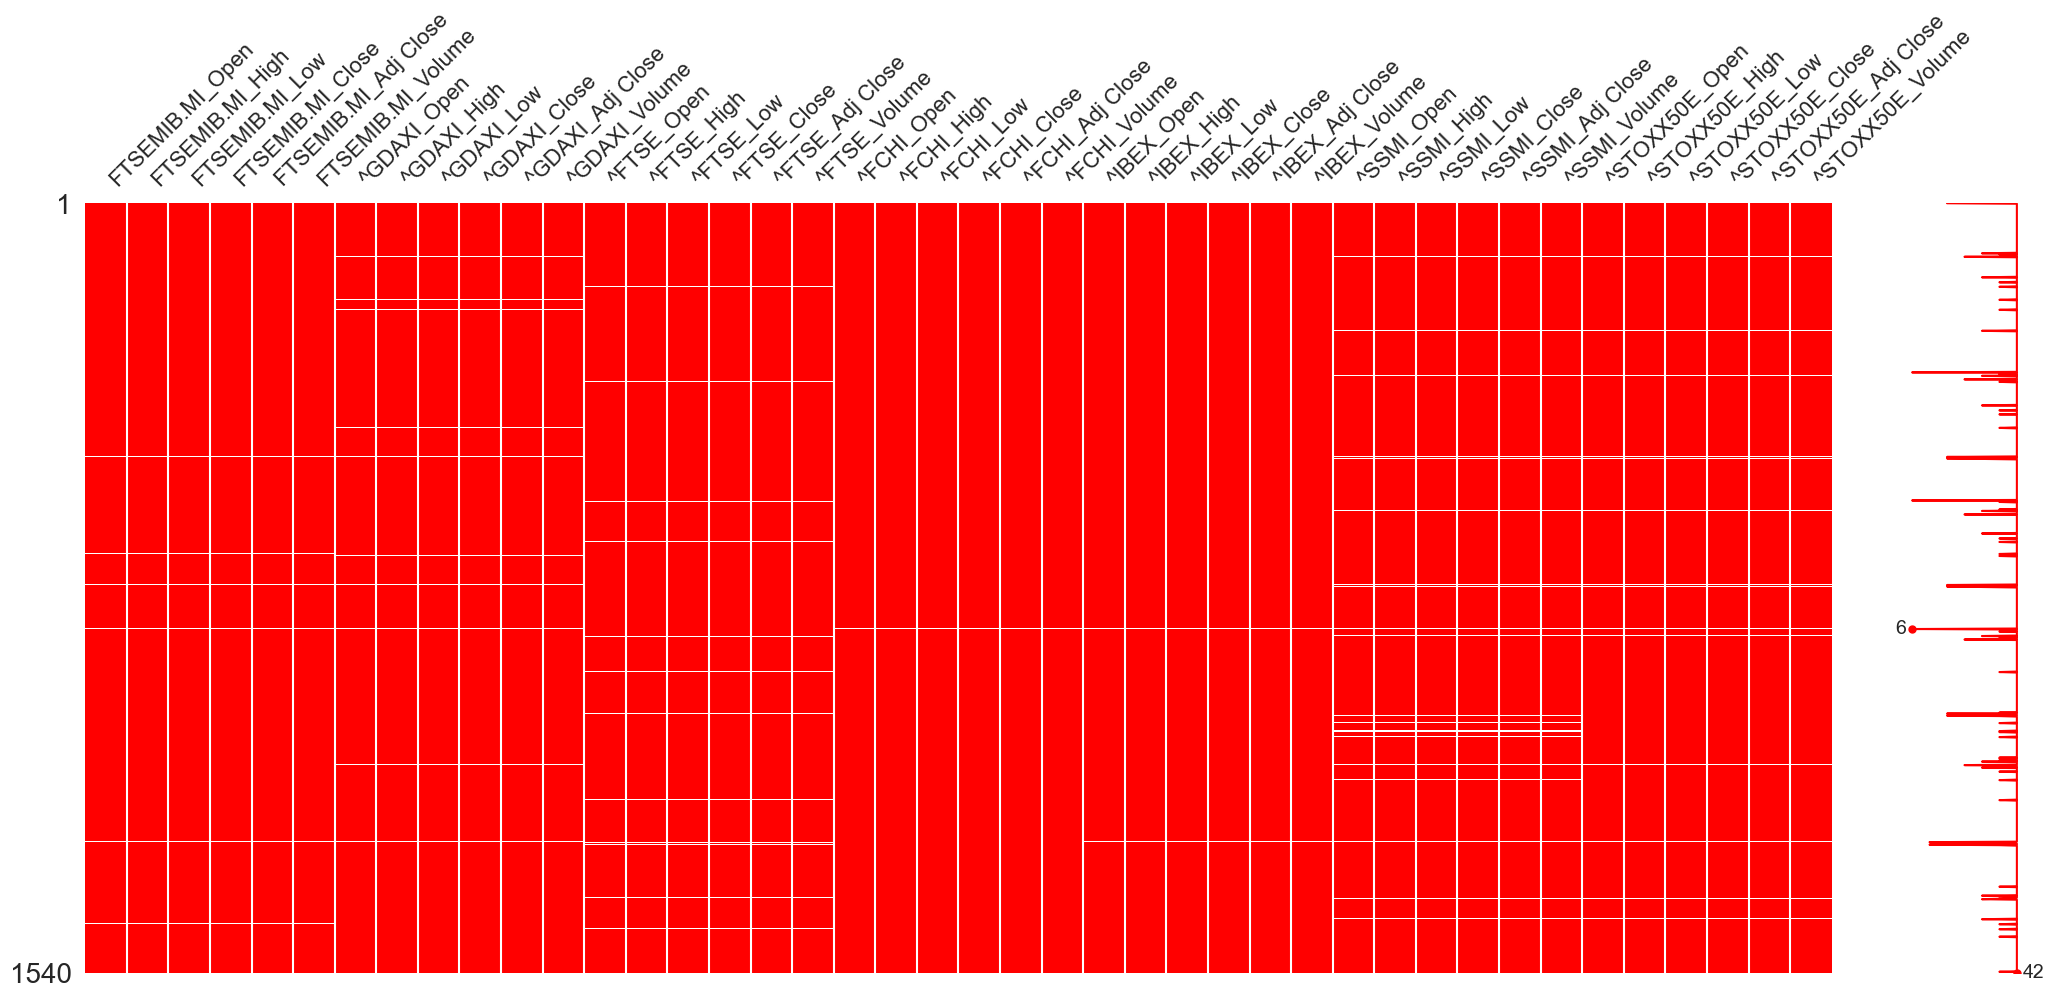

In [14]:
# Import the library 
import missingno as msno

# We plot the missing data
msno.matrix(stock_data, color=(1, 0, 0)) # Red color 

plt.show()

As we can see, we do not have many data missing, so we are good to go. 

If you want to get a better view of the missing data for each stock index, then create a data frame for each of them and then use `missingno` again. For example, let's see what the missing data looks like for the **Milano Italia Borsa (FTSE MIB)**: 

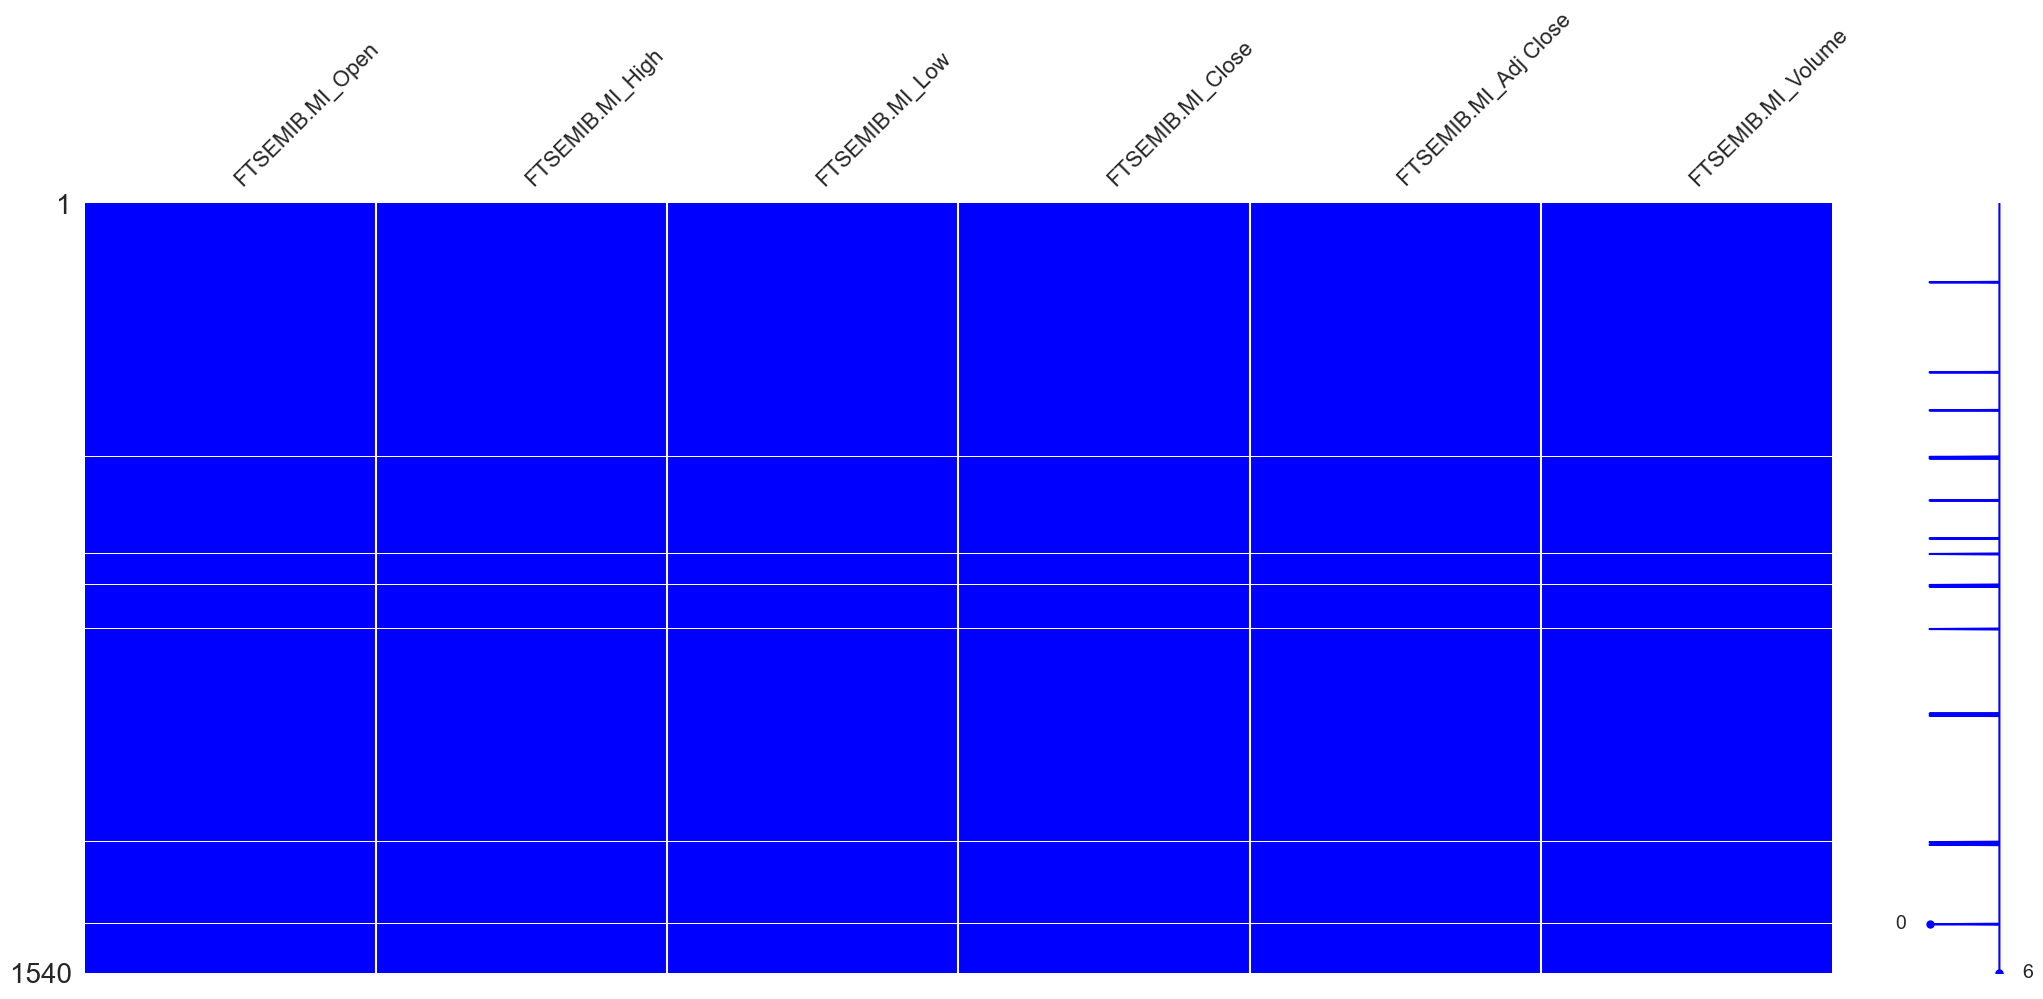

In [15]:
# We create the MIB dataframe
MIB_data = stock_data.filter(like='FTSEMIB.MI')

MIB_data.head()

# Plot the missing data
msno.matrix(MIB_data, color=(0, 0, 1)) # Blue color 

plt.show()

We can repeat this for each stock index. 

### Line Charts

Continuing forward, our next objective is to generate some line charts that show the movement of our data over time. This aims to explore potential trends or shifts in price movements. 

We can use the previously generated data frames containing adjusted closing prices to create individual plot. 

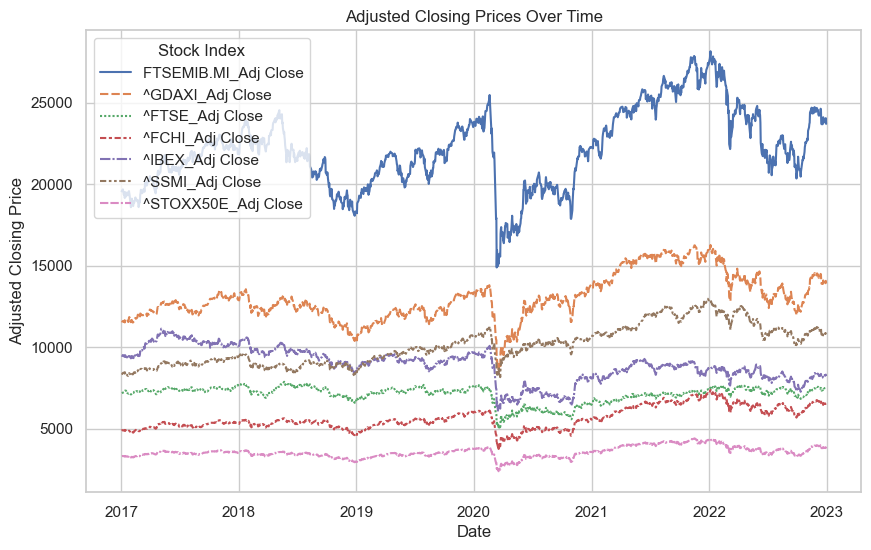

In [16]:
# Using Seaborn, we create a plot for the adjusted closing price
sns.set(style="whitegrid")

# Plotting all adj closing prices with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=ajd_close_prices_data)
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend(title='Stock Index')
plt.show()


Another way to do this, can be by using `Matplotlib`, as below:

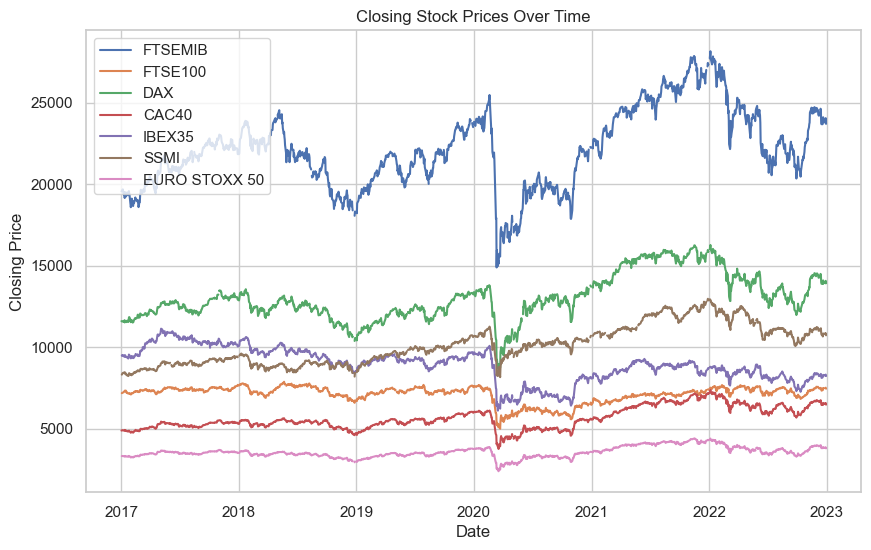

In [17]:
# Plot of closing prices using Matplotlib

plt.figure(figsize=(10, 6))
plt.plot(stock_data['FTSEMIB.MI_Close'], label='FTSEMIB')
plt.plot(stock_data['^FTSE_Close'], label='FTSE100')
plt.plot(stock_data['^GDAXI_Close'], label='DAX')
plt.plot(stock_data['^FCHI_Close'], label='CAC40')
plt.plot(stock_data['^IBEX_Close'], label='IBEX35')
plt.plot(stock_data['^SSMI_Close'], label='SSMI')
plt.plot(stock_data['^STOXX50E_Close'], label='EURO STOXX 50')
plt.title('Closing Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


These line charts are quite effective for identifying trends or irregularities.

For example, we observe a substantial decline in prices across all stock indices during the March 2020 timeframe. This corresponds to the period when the COVID-19 pandemic had a significant impact on the global economy, leading to a widespread sell-off of stocks.

Furthermore, it is evident from the chart that the Milano Italia Borsa index experienced a more significant decrease. Considering the context of the COVID-19 crisis in Italy during that period, it aligns with the observation that the Italian economy was among the most affected in Europe. 

The attached graph illustrates the peak in daily deaths around March-April 2020 in Italy, providing additional context to the situation. 

![Daily Deaths in Italy](covid_italy.jpg)

The data source for this information is available on the linked website.

https://www.worldometers.info/coronavirus/country/italy/


### Candlestick Charts

Another visualization tool is the candlestick chart.

Candlestick charts are a type of financial chart used to represent the price movements of stocks, over a specific time period. They provide a visual representation of price fluctuations and are really useful in identifying trends, and potential future price movements. Each "candlestick" on the chart represents the open, close, high, and low prices for a given time interval, typically a day.

The candlestick has two main components:

Body: The rectangular area between the open and close prices. If the close price is higher than the open price, the body is often filled or colored. If the close price is lower, the body may be empty or a different color.

Wicks or Shadows: The thin lines, called wicks or shadows, extend from the top and bottom of the body and represent the high and low prices during the time period.

![Candlestick Chart](candlestick_chart.jpg)

Candlestick charts are so popular in financial analysis because they provide a comprehensive and visually way to interpret price action in financial markets. There are different patterns that candlestick charts display, which help in analysing the market trends, but I will not talk about them in details. 

The picture above can be found at https://www.investopedia.com/trading/candlestick-charting-what-is-it/

Now, let's create candlestick charts for our stock indices. First we need to make sure we have the `plotly` library installed. If not, ` pip install plotly` will do the job. 

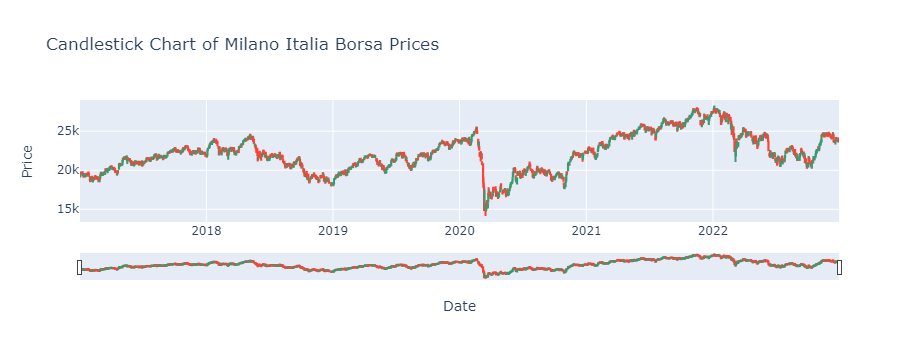

In [18]:
# Import plotly library as shown
import plotly.graph_objects as go

# Create candlestick chart for Milano Italia Borsa
fig = go.Figure(data=[go.Candlestick(x=stock_data.index,
                open=stock_data['FTSEMIB.MI_Open'],
                high=stock_data['FTSEMIB.MI_High'],
                low=stock_data['FTSEMIB.MI_Low'],
                close=stock_data['FTSEMIB.MI_Close'])])

fig.update_layout(title='Candlestick Chart of Milano Italia Borsa Prices',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


When the closing price surpasses the opening price, the candlestick is depicted in green. Otherwise, if the price declines throughout the day, the candlestick appears in red. A brief observation of the candlestick lengths reveals that 2020 marked a period when prices consistently declined.

If we want to take a look closely at a specific time frame, we can use `.loc()` to filter the index (which in our case is the date) and then repeat the steps above.  

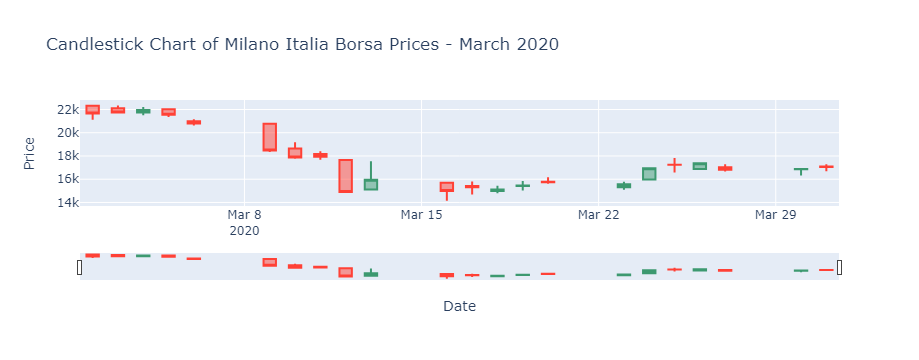

In [19]:
s_date = '2020-03-01'
e_date = '2020-03-31'

# Filter DataFrame for March 2020
march_data = stock_data.loc[(stock_data.index >= s_date) & (stock_data.index <= e_date)]

# Create candlestick chart for March 2020
fig = go.Figure(data=[go.Candlestick(x=march_data.index,
                open=march_data['FTSEMIB.MI_Open'],
                high=march_data['FTSEMIB.MI_High'],
                low=march_data['FTSEMIB.MI_Low'],
                close=march_data['FTSEMIB.MI_Close'])])

fig.update_layout(title='Candlestick Chart of Milano Italia Borsa Prices - March 2020',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


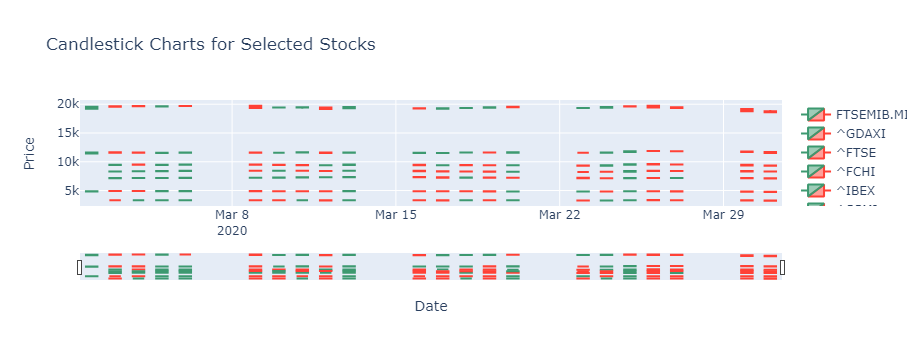

In [20]:
# List all my stocks
stock_index = ['FTSEMIB.MI', '^GDAXI', '^FTSE', '^FCHI', '^IBEX', '^SSMI', '^STOXX50E']

# Set the start and end date
s_date = '2020-03-01'
e_date = '2020-03-31'

# Filter DataFrame for March 2020
march_data = stock_data.loc[(stock_data.index >= s_date) & (stock_data.index <= e_date)]

# Plot candlestick charts for each stock
fig = go.Figure()

for stock in stock_index:
    fig.add_trace(go.Candlestick(x=march_data.index,
                    open=stock_data[f'{stock}_Open'],
                    high=stock_data[f'{stock}_High'],
                    low=stock_data[f'{stock}_Low'],
                    close=stock_data[f'{stock}_Close'],
                    name=stock))

fig.update_layout(title='Candlestick Charts for Selected Stocks',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

## Financial Analysis 

### Return Analysis

Return analysis of the stock market includes the evaluation and examination of the performance of an investment by assessing the returns it generates over a specific period. 

This analysis includes calculating absolute and annualized returns, comparing performance against indices, assessing risk-adjusted returns through ratios like the Sharpe and Treynor ratios, and considering factors like dividend yield. 

Additionally, return analysis provides insights into the consistency of the performance of the market in general, and by analyzing returns, we try to get a better idea of the success of the investments. 

Now, let's calculate the return of our stock indices for each closing price. For this, we can use `.pct_change()` function is a method provided by pandas, a popular data manipulation library in Python. This function is specifically used with time series data, such as stock prices or other sequential data, and it calculates the percentage change between the current and a prior element in the series.


In [21]:
# List my stock index
stock_index = ['FTSEMIB.MI', '^GDAXI', '^FTSE', '^FCHI', '^IBEX', '^SSMI', '^STOXX50E']

# Extract the closing prices for all stocks
closing_prices = stock_data[[f'{stock}_Adj Close' for stock in stock_index]]

# Calculate daily returns for all stocks
returns_data = closing_prices.pct_change()

# Print the first and last rows of the returns
print(returns_data.head())
print(returns_data.tail())

            FTSEMIB.MI_Adj Close  ^GDAXI_Adj Close  ^FTSE_Adj Close  \
Date                                                                  
2017-01-02                   NaN               NaN              NaN   
2017-01-03              0.000307         -0.001215              NaN   
2017-01-04              0.002759          0.000006         0.001644   
2017-01-05              0.000815          0.000054         0.000779   
2017-01-06              0.002291          0.001214         0.002057   

            ^FCHI_Adj Close  ^IBEX_Adj Close  ^SSMI_Adj Close  \
Date                                                            
2017-01-02              NaN              NaN              NaN   
2017-01-03         0.003472              NaN              NaN   
2017-01-04         0.000014        -0.003349         0.004645   
2017-01-05         0.000253         0.002674         0.004510   
2017-01-06         0.001877         0.002919         0.002975   

            ^STOXX50E_Adj Close  
Date        

In [22]:
# To see the return values for the first week of March 2020 we filter the data as given below

# List all my stocks
stock_index = ['FTSEMIB.MI', '^GDAXI', '^FTSE', '^FCHI', '^IBEX', '^SSMI', '^STOXX50E']

# Set the start and end date
s_date = '2020-03-01'
e_date = '2020-03-8'

# Filter DataFrame for the first week of March 2020
first_week_data = stock_data.loc[(stock_data.index >= s_date) & (stock_data.index <= e_date)]

# Extract the closing prices for all stocks
closing_prices_fweek = first_week_data[[f'{stock}_Adj Close' for stock in stock_index]]

# Calculate daily returns for all stocks
returns_data_fweek = closing_prices_fweek.pct_change()

# Print the returns
print(returns_data_fweek.head(5))

            FTSEMIB.MI_Adj Close  ^GDAXI_Adj Close  ^FTSE_Adj Close  \
Date                                                                  
2020-03-02                   NaN               NaN              NaN   
2020-03-03              0.004295          0.010754         0.009512   
2020-03-04              0.009104          0.011873         0.014498   
2020-03-05             -0.017816         -0.015087        -0.016169   
2020-03-06             -0.035027         -0.033726        -0.036210   

            ^FCHI_Adj Close  ^IBEX_Adj Close  ^SSMI_Adj Close  \
Date                                                            
2020-03-02              NaN              NaN              NaN   
2020-03-03         0.011184         0.008019         0.013725   
2020-03-04         0.013298         0.011167         0.016257   
2020-03-05        -0.018992        -0.025477        -0.010518   
2020-03-06        -0.041408        -0.035403        -0.040099   

            ^STOXX50E_Adj Close  
Date        

In [23]:
returns_data_fweek.shape

(5, 7)

By using the data frame, we can see how much we gain or loss the first week of March 2020. The positive values represent gains and the negative values represent losses. 

For example, FTSE MIB gained 0.43 % on March 3rd and 0.91% on March 4th, but lost 1.78% on the 5th and 3.502% on the 6th, resulting in a loss overall. 

To get a better understanding, we can use Average Daily Returns.The average returns is the expected value of an investment’s change over time. To calculate the average daily return, we use the formula: 

**ADR = Sum of Daily Returns / Number of Trading Days**.

We can calculate the ADR in Python simply by using the `.mean()` function. 

In [24]:
# Calculate the ADR
returns_data.mean()

FTSEMIB.MI_Adj Close    0.000219
^GDAXI_Adj Close        0.000197
^FTSE_Adj Close         0.000079
^FCHI_Adj Close         0.000257
^IBEX_Adj Close        -0.000017
^SSMI_Adj Close         0.000210
^STOXX50E_Adj Close     0.000162
dtype: float64

The above results are the average daily returns over 5 years. In other words, it seems that the value of the stock market in Italy has increased by 0.022% each day.
While, IBEX, the stock index for the Spanish market seem to have decreased by 0.0017% daily, indicating that the Spanish economy was struggling even before Covid, and Covid impacted it even more.

Another way to analyse our data, would be by calculating the **Best** and the **Worst** day returns. For this, we simply need to find what is the minimum and the maximum return for each stock index. 

In [25]:
# Find the minimum and maximum returns for each stock and their corresponding dates
min_returns_dates = returns_data.idxmin(axis=0)
max_returns_dates = returns_data.idxmax(axis=0)
min_return = returns_data.min(axis=0)
max_return = returns_data.max(axis=0)

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    'Stock': stock_index,
    'Worst Day Return': min_returns_dates,
    'Minimum Value': min_return,
    'Best Day Return': max_returns_dates,
    'Maximum Value': max_return
})

# Print the resulting DataFrame
print(result_df)

                           Stock Worst Day Return  Minimum Value  \
FTSEMIB.MI_Adj Close  FTSEMIB.MI       2020-03-12      -0.169279   
^GDAXI_Adj Close          ^GDAXI       2020-03-12      -0.122386   
^FTSE_Adj Close            ^FTSE       2020-03-12      -0.108738   
^FCHI_Adj Close            ^FCHI       2020-03-12      -0.122768   
^IBEX_Adj Close            ^IBEX       2020-03-12      -0.140592   
^SSMI_Adj Close            ^SSMI       2020-03-12      -0.096374   
^STOXX50E_Adj Close    ^STOXX50E       2020-03-12      -0.124014   

                     Best Day Return  Maximum Value  
FTSEMIB.MI_Adj Close      2020-03-24       0.089267  
^GDAXI_Adj Close          2020-03-24       0.109759  
^FTSE_Adj Close           2020-03-24       0.090530  
^FCHI_Adj Close           2020-03-24       0.083895  
^IBEX_Adj Close           2020-11-09       0.085730  
^SSMI_Adj Close           2020-03-24       0.070156  
^STOXX50E_Adj Close       2020-03-24       0.092362  


It is not a surprise that the Worst Day Returns are during March 2020 (peak of pandemic). 

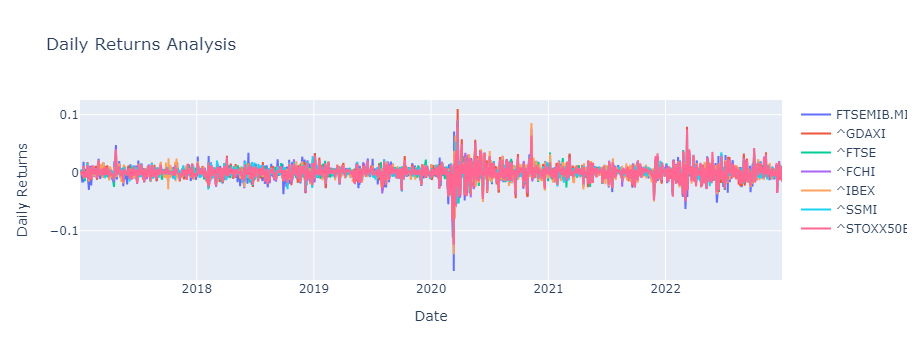

In [26]:
# Plot returns
fig = go.Figure()

for stock in stock_index:
    fig.add_trace(go.Scatter(x=returns_data.index, y=returns_data[f'{stock}_Adj Close'],
                             mode='lines', name=stock))

fig.update_layout(title='Daily Returns Analysis',
                  xaxis_title='Date',
                  yaxis_title='Daily Returns')

fig.show()

The plot of the returns seem to be quite messy. So let's create some subplots. To do so, Plotly's `make_subplots` function comes in handy.

The code below creates a subplot for each stock, arranging them vertically. The `make_subplots` function is used to create a subplot grid, and each stock's returns are plotted in a separate subplot. 

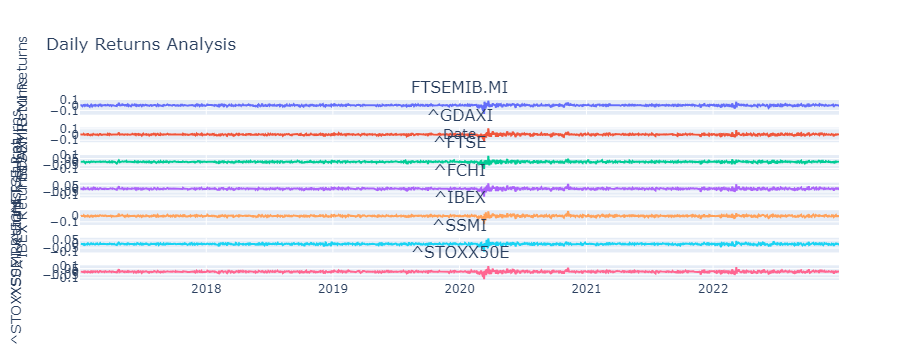

In [27]:
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=len(stock_index), cols=1, shared_xaxes=True, subplot_titles=stock_index)

# Plot returns in separate subplots
for i, stock in enumerate(stock_index, start=1):
    fig.add_trace(go.Scatter(x=returns_data.index, y=returns_data[f'{stock}_Adj Close'],
                             mode='lines', name=stock),
                  row=i, col=1)

# Update layout
fig.update_layout(title='Daily Returns Analysis',
                  xaxis_title='Date',
                  showlegend=False)

# Update subplot titles
for i, stock in enumerate(stock_index, start=1):
    fig.update_yaxes(title_text=f'{stock} Returns', row=i, col=1)

fig.show()

We can also plot the distribution plot of each stock index as shown above: 

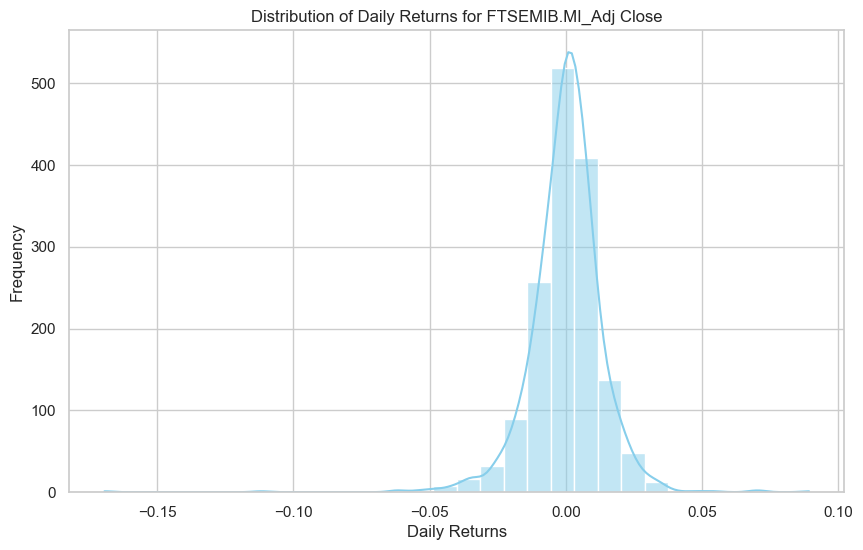

In [28]:
# Calculate daily returns
returns_data_1 = stock_data['FTSEMIB.MI_Adj Close'].pct_change().dropna()

# Plot distribution plot for returns
plt.figure(figsize=(10, 6))
sns.histplot(returns_data_1, kde=True, color='skyblue', bins=30)
plt.title(f'Distribution of Daily Returns for FTSEMIB.MI_Adj Close')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


From these charts, it is evident that the lowest returns occurred in March 2020, demonstrating again substantial impact of the pandemic on the market. Once again, the data highlights the profound influence of global events on financial markets, with March 2020 reflecting a period of particularly diminished returns. 

And lastly, let's look at the **Volatility** of these stock index.

Volatility refers to the degree of variation or fluctuation in the price of a stock. It is a statistical measure that quantifies the dispersion of returns for a given security or market index.

High volatility implies that the price of the asset can change dramatically in a short period, while low volatility suggests more stable and gradual price movements. We are interested in the **Historical Volatility**, which measures how much the price of an asset has deviated from its average price over a specific period in the past. Historical volatility is often calculated as the standard deviation of the daily returns.

In [29]:
# Calculate volatility (standard deviation of returns)
volatility = returns_data.std()
volatility

FTSEMIB.MI_Adj Close    0.013609
^GDAXI_Adj Close        0.012492
^FTSE_Adj Close         0.010403
^FCHI_Adj Close         0.012093
^IBEX_Adj Close         0.012275
^SSMI_Adj Close         0.009419
^STOXX50E_Adj Close     0.012186
dtype: float64

It seems like the SSMI has the lowest standard deviation, suggesting that the Swiss market might have been the most stable and safe markets. 

## Conclusions

In conclusion, this comprehensive tutorial has provided a foundational understanding of a simple financial analysis using Python, offering a step-by-step guide to leveraging powerful libraries such as yfinance, pandas, and Plotly. 

We started by fetching historical stock data for a diverse set of European indices, examining the impact of major events like the COVID-19 pandemic on stock markets. 

We explored key financial metrics, including stock prices, returns, and daily volatility, to uncover trends and anomalies. 

The tutorial also demonstrated how to create insightful visualizations, such as candlestick charts and line plots, to enhance data interpretation. 

Additionally, we conducted return analysis, calculated average daily returns and volatility. By employing practical examples and hands-on coding exercises, this tutorial equips you with the essential tools and skills to conduct a simple financial analysis, helping you to get some information regarding different investments.